In [1]:
import psycopg2
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
activesconn = psycopg2.connect(host="localhost",user="antopher",password="4S&7Ya", dbname="actives")
c=activesconn.cursor()

/home/antopher/.local/lib/python3.5/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
enddate = datetime.utcnow().date()
startdate =enddate - timedelta(1)
enddate=str(enddate)
startdate = str(startdate)
c.execute("SELECT datestamp, username, totalacts, clanname, totalxp FROM members WHERE datestamp = %s or datestamp = %s ORDER BY datestamp", [startdate,enddate])
activedata = c.fetchall()
subdata2 = {}

In [19]:
activedata

[('2019-05-16', 'Vysn', 11176837, 'The Illusionists', 251880715254),
 ('2019-05-16', 'Karubo', 13603072, 'Necropolis', 328534620389),
 ('2019-05-16', 'Legend', 5067449, 'Night', 29254798217),
 ('2019-05-16', 'hardcoreplayer', 3441011, 'Clan of Doom', 18303551494),
 ('2019-05-16', 'Cainneach', 7728741, 'Swisher House', 73224016378),
 ('2019-05-16', 'spidi', 4110767, 'Kute Kitten Klan', 19150805025),
 ('2019-05-16', 'Knox', 1727269, None, 6369269160),
 ('2019-05-16', 'EyeCanCu', 2732729, 'Necromancers ', 7750055696),
 ('2019-05-16', 'Nyx', 5478161, 'Night', 15641614037),
 ('2019-05-16', 'Yuna', 8834357, 'Wrong Chat', 217150693726),
 ('2019-05-16', 'Nelmen', 4345358, 'Slayers', 6630373804),
 ('2019-05-16', 'smashedolbasher', 11750930, 'Swisher House', 246810548836),
 ('2019-05-16', 'jay', 5358078, 'Kute Kitten Klan', 38962125802),
 ('2019-05-16', 'fakefirefly', 15639943, 'High Times', 176575212221),
 ('2019-05-16', 'Pixie', 5393440, 'Forbidden Realm', 40158719812),
 ('2019-05-16', 'TheGaf

In [3]:
for date,name,acts,someclan, xp in activedata:
    if name not in subdata2:
        subdata2.update({name:{"clan":someclan}})
    subdata2[name].update({date:(int(acts), int(xp))})

In [6]:
subdata2


{'DumbCow': {'2019-05-16': (3701296, 22186851544),
  '2019-05-17': (3711205, 22493354397),
  'clan': 'Knights Regiment'},
 'BoxerShorts': {'2019-05-16': (8400184, 343479579942),
  '2019-05-17': (8413316, 345530854846),
  'clan': 'The Ghost Symbol'},
 'Rexford': {'2019-05-16': (1478435, 14619481329),
  '2019-05-17': (1485648, 14710208405),
  'clan': 'Knights Regiment'},
 'Gimrin': {'2019-05-16': (6806038, 110626862009),
  '2019-05-17': (6821771, 111677418887),
  'clan': 'Heavy Metal Unicorns'},
 'NotWillHawgood': {'2019-05-16': (210920, 367033766),
  '2019-05-17': (210920, 367033766),
  'clan': 'Necromancers '},
 'GuessWho': {'2019-05-16': (7326, 1395460),
  '2019-05-17': (7326, 1395460),
  'clan': None},
 'Sherbear': {'2019-05-16': (55043, 3868691), 'clan': None},
 'elnaeth': {'2019-05-16': (607421, 2930656929),
  '2019-05-17': (611238, 2953322145),
  'clan': 'Swisher House'},
 'BloodBath': {'2019-05-16': (892395, 3927550949),
  '2019-05-17': (899775, 3965746025),
  'clan': 'The Queens

In [18]:
df = pd.DataFrame.from_dict(subdata2, orient='index')
df.head()

KeyError: '2019-05-17'

In [26]:
sqlll = "SELECT datestamp, username, totalacts, clanname, totalxp FROM members"
dfsql = pd.read_sql(sqlll,activesconn)

In [27]:
dfsql

,datestamp,username,totalacts,clanname,totalxp
0,2019-03-05,Vysn,10444085,The Illusionists,190327854608
1,2019-03-05,Karubo,12443259,Necropolis,223767320983
2,2019-03-05,mond,16255141,The Ghost Symbol,277087750530
3,2019-03-05,Legend,4246366,Wrong Chat,14622359526
4,2019-03-05,hardcoreplayer,3040563,Clan of Doom,11927498491
5,2019-03-05,Cainneach,6927541,Swisher House,46664921642
6,2019-03-05,spidi,3772258,Kute Kitten Klan,13455650604
7,2019-03-05,Knox,1727030,None,6367814508
8,2019-03-05,EyeCanCu,2558168,Necromancers,5667253007
9,2019-03-05,Nyx,5137419,Night,14073735034


In [66]:
dfsql[dfsql.clanname == "None of the above"].groupby('datestamp').totalxp.sum()

datestamp
2019-03-05     6774019913094
2019-03-06     6838882303760
2019-03-07     6908423622412
2019-03-08     6979715710000
2019-03-09     7053521138963
2019-03-10     7126200842867
2019-03-11     7200369745339
2019-03-12     7276243548174
2019-03-13     7222295812577
2019-03-14     7294598263775
2019-03-15     7370335634524
2019-03-16     7448743860909
2019-03-17     7522082706880
2019-03-18     7600382059355
2019-03-19     7674971640821
2019-03-20     7746787579820
2019-03-21     7828217953452
2019-03-22     7905335184903
2019-03-23     7985091423046
2019-03-25     8139499057632
2019-03-26     8214396621873
2019-03-27     8296119374451
2019-03-28     8372993570325
2019-03-29     8452462212770
2019-03-30     8542571698019
2019-03-31     8752030147409
2019-04-01     8847313866752
2019-04-02     8935736562996
2019-04-03     9022025332815
2019-04-04     9112589014296
                   ...      
2019-04-18    10451320124757
2019-04-19    10551509716158
2019-04-20    10658510054868
2019

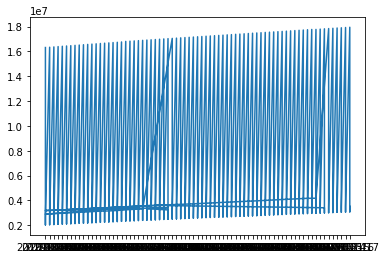

In [47]:
tgbnhy_df = dfsql[dfsql.clanname == 'None of the above']
plt.plot(tgbnhy_df.datestamp, tgbnhy_df.totalacts)
plt.show()

In [71]:
dfnow = dfsql[dfsql.datestamp == '2019-05-17']

In [74]:
dfnota = dfnow[dfnow.clanname == 'None of the above']


In [75]:
dfnota

,datestamp,username,totalacts,clanname,totalxp,topsies
94878,2019-05-17,zDexxa,17946124,None of the above,2299283619032,389.0
94942,2019-05-17,Batosi,7512705,None of the above,220972537702,13224.0
94943,2019-05-17,tgbnhy,9973951,None of the above,88372771295,22954.0
94947,2019-05-17,Snopolopocus,9152571,None of the above,555832942379,5914.0
94964,2019-05-17,Fukuyama,11827453,None of the above,435140270931,7414.0
94979,2019-05-17,sticky,13585665,None of the above,1239365556070,2141.0
94983,2019-05-17,MissDutch,16842341,None of the above,259368378201,11599.0
94994,2019-05-17,Girewi,14138383,None of the above,661678772294,4948.0
94997,2019-05-17,realmanmode,11727852,None of the above,651023820687,5018.0
95007,2019-05-17,Fakebirdie,14517959,None of the above,701189045352,4688.0
